**CROP RECOMMENDATION SYSTEM (RandomForestClassifier)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# New Section

Load and Explore the Dataset

In [ ]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape  # Rows and columns

(2200, 8)

In [ ]:
df.info()  # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()  # Stats

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
 df['label'].value_counts()  # Crop distribution

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Data Visualization

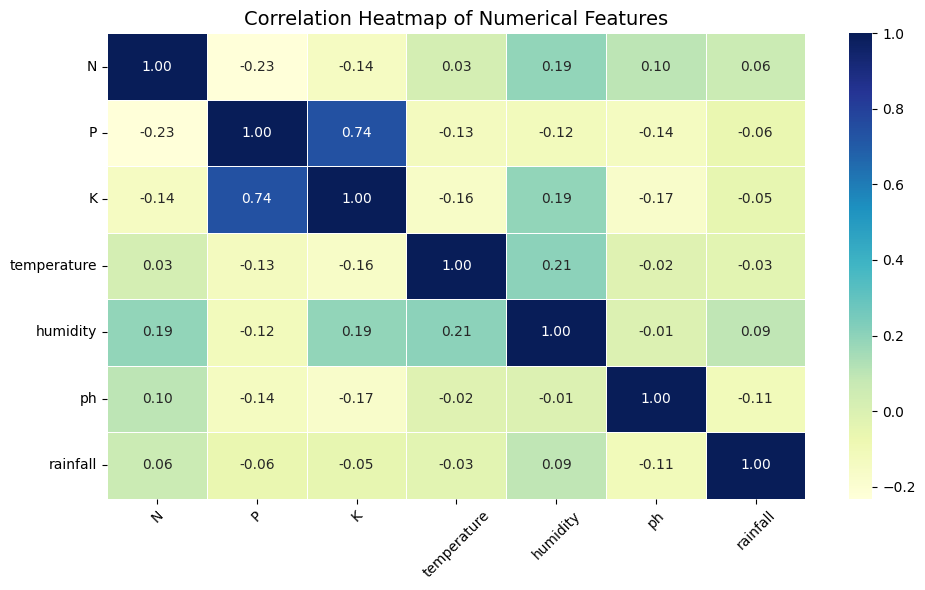

In [ ]:
# Remove non-numeric column for correlation
numeric_df = df.drop('label', axis=1)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


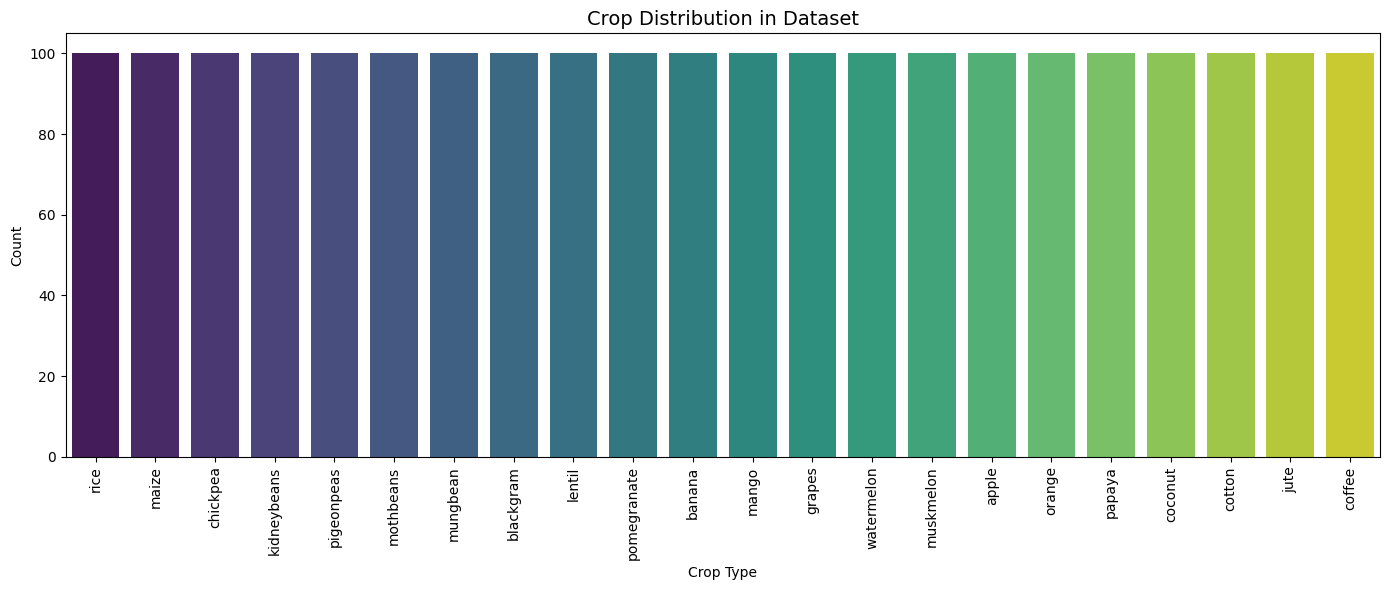

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='label', hue='label', order=df['label'].value_counts().index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title("Crop Distribution in Dataset", fontsize=14)
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


 Preprocessing

In [ ]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


In [ ]:
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train ML Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

 Make Predictions with Sample Input

In [ ]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create DataFrame instead of NumPy array
sample_input = pd.DataFrame([[90, 40, 40, 25, 80, 6.5, 200]], columns=columns)

# Make prediction
prediction = model.predict(sample_input)
predicted_crop = le.inverse_transform(prediction)[0]

print("🌾 Recommended Crop:", predicted_crop)


🌾 Recommended Crop: rice


Real-Time Weather Integration

In [ ]:
import requests

# Weather fetching function
def get_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        rainfall = data.get('rain', {}).get('1h', 0)  # default to 0 if not available
        return temperature, humidity, rainfall
    else:
        print("❌ Could not fetch weather data. Please check your city name or API key.")
        return None, None, None

# Your OpenWeatherMap API key
api_key = "9a4b062be3ccd30f0abbd5b7947026dd"

# 📍 Get city and soil input from user
city = input("Enter your city name: ")
try:
    N = float(input("Enter Nitrogen (N) value: "))
    P = float(input("Enter Phosphorus (P) value: "))
    K = float(input("Enter Potassium (K) value: "))
    pH = float(input("Enter soil pH value: "))
except ValueError:
    print("❌ Invalid input. Please enter numeric values.")
    exit()

# 🌦️ Get weather
temperature, humidity, rainfall = get_weather(city, api_key)

# 🌾 Predict crop
if temperature is not None and humidity is not None and rainfall is not None:
    input_df = pd.DataFrame([{
    'N': N,
    'P': P,
    'K': K,
    'temperature': temperature,
    'humidity': humidity,
    'ph': pH,
    'rainfall': rainfall
}])
    prediction = model.predict(input_df)
    predicted_crop = le.inverse_transform(prediction)[0]
    print("\n🌱 Based on your inputs, the recommended crop is:", predicted_crop)
else:
    print("⚠️ Skipping prediction due to missing weather data.")





Enter your city name: khammam
Enter Nitrogen (N) value: 70
Enter Phosphorus (P) value: 20
Enter Potassium (K) value: 20
Enter soil pH value: 3

🌱 Based on your inputs, the recommended crop is: muskmelon


Fertilizer recommendation

In [ ]:
import pandas as pd

data = {
    "Crop": ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbean", "blackgram", "lentil", "pomegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"],
    "N": [90, 80, 70, 70, 70, 60, 60, 60, 60, 80, 100, 100, 80, 90, 60, 80, 90, 100, 80, 100, 60, 80],
    "P": [40, 35, 25, 30, 25, 20, 25, 25, 25, 40, 30, 40, 40, 60, 40, 40, 50, 40, 50, 50, 40, 30],
    "K": [40, 40, 25, 30, 30, 20, 25, 25, 25, 40, 200, 50, 60, 60, 40, 80, 50, 100, 300, 50, 40, 80],
    "Fertilizer_Name": ["Urea", "Compost + NPK", "RDF-based NPK (12-32-16)", "DAP (Diammonium Phosphate)", "Organic Manure", "Compost + Urea", "RDF-based NPK", "DAP + Vermicompost", "Organic Manure", "NPK 8-8-8", "Muriate of Potash", "Compost + NPK Slow Release", "NPK 19-19-19", "DAP + Potash + Compost", "Compost + DAP", "NPK 17-17-17", "Citrus-specific NPK", "NPK 20-10-20", "Muriate of Potash + Organic", "Super Phosphate + Urea + Potash", "NPK 12-32-16", "NPK 19-19-19 + Organic"],
                        "Description": ["Urea (46% N) for nitrogen replenishment", "Organic compost + balanced NPK blend", "Recommended dose for pulses", "High phosphorus requirement", "Farmyard manure for slow nutrient release", "Compost base with supplemental urea", "Balanced for legumes", "Phosphorus boost + organic matter", "Neutral NPK suit for pulses", "Nutrient balance for fruiting crops", "Potassium-focused for fruit quality", "Nutrient-supportive mix", "Balanced blend", "Heavy feeder needs all three", "Organic with moderate phosphorus", "Mature fruit tree maintenance", "Fertilizer for citrus nutrition", "Fruit yield support", "Palm high K requirement", "High N-P-K blend", "Leafy fiber crop fertilizer", "Blend suitable for shade trees"]
                        }

df = pd.DataFrame(data)
df.to_csv('fertilizer.csv', index=False)


In [ ]:
# Load the fertilizer CSV just created
fertilizer_df = pd.read_csv('fertilizer.csv')

def get_fertilizer_recommendation(crop, N, P, K):
    crop_row = fertilizer_df[fertilizer_df['Crop'].str.lower() == crop.lower()]

    if crop_row.empty:
        return "❌ Fertilizer info not found for this crop."

    rec_N = crop_row.iloc[0]['N']
    rec_P = crop_row.iloc[0]['P']
    rec_K = crop_row.iloc[0]['K']
    fert_name = crop_row.iloc[0]['Fertilizer_Name']
    fert_desc = crop_row.iloc[0]['Description']

    diff_N = N - rec_N
    diff_P = P - rec_P
    diff_K = K - rec_K

    advice = f"\n🔍 Fertilizer Adjustment:\n"
    if diff_N > 10:
        advice += f"• Reduce Nitrogen by {diff_N} units\n"
    elif diff_N < -10:
        advice += f"• Increase Nitrogen by {-diff_N} units\n"

    if diff_P > 10:
        advice += f"• Reduce Phosphorus by {diff_P} units\n"
    elif diff_P < -10:
        advice += f"• Increase Phosphorus by {-diff_P} units\n"

    if diff_K > 10:
        advice += f"• Reduce Potassium by {diff_K} units\n"
    elif diff_K < -10:
        advice += f"• Increase Potassium by {-diff_K} units\n"

    advice += f"\n🧪 Recommended Fertilizer: {fert_name}\n📄 Description: {fert_desc}"
    return advice

# Show fertilizer suggestion
fertilizer_advice = get_fertilizer_recommendation(predicted_crop, N, P, K)
print(fertilizer_advice)



🔍 Fertilizer Adjustment:
• Increase Nitrogen by 20.0 units

🧪 Recommended Fertilizer: Urea
📄 Description: Urea (46% N) for nitrogen replenishment


In [ ]:
import pickle

# Save model
with open('crop_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [ ]:
from google.colab import files

files.download('crop_prediction_model.pkl')
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>